In [1]:
from cdalvaro.catalogues import OpenClust
from cdalvaro.data_base import DB
from cdalvaro.logging import Logger
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logger = Logger.instance()
logger.setLevel(logging.ERROR)

db = DB.instance(host='ai.cdalvaro.io', port=15432)

<AxesSubplot:xlabel='ra', ylabel='dec'>

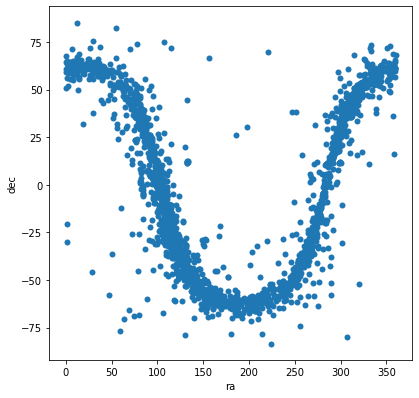

In [3]:
openclust_df = OpenClust.catalogue(as_dataframe=True)
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="ra", y="dec", linewidth=0, data=openclust_df, ax=ax)

In [4]:
cluster_name = 'NGC 2353'
cluster = OpenClust.get_clusters(names={cluster_name})

In [5]:
df = db.get_stars(region=cluster[cluster_name])

<AxesSubplot:xlabel='ra', ylabel='dec'>

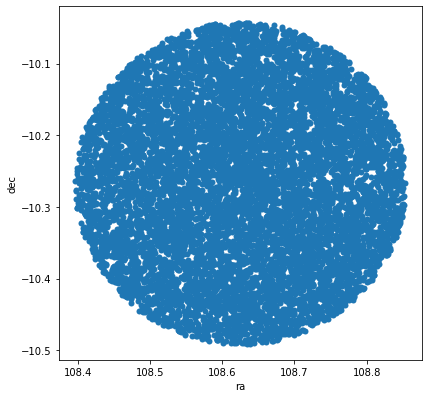

In [6]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="ra",
                y="dec",
                linewidth=0,
                data=df,
                ax=ax)